In [6]:
# Uninstall conflicting versions
!pip uninstall -y numpy scikit-learn scikit-learn-extra
# Reinstall compatible versions
!pip install numpy==1.24.3 scikit-learn==1.3.0 scikit-learn-extra==0.3.0


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: scikit-learn-extra 0.3.0
Uninstalling scikit-learn-extra-0.3.0:
  Successfully uninstalled scikit-learn-extra-0.3.0
  Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 95.2 MB/s eta 0:00:00
Using cached scikit_learn_extra-0.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.24.3 

In [4]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create DataFrame for exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Basic exploration
print("Dataset shape:", df.shape)
print("\nClass distribution:\n", df['target'].value_counts())
print("\nFeature summary:\n")
df.describe()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Dataset shape: (178, 14)

Class distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64

Feature summary:



In [2]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Performance Metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Adjusted Rand Index (ARI):", kmeans_ari)


K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index (ARI): 0.8974949815093207


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
# K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Performance Metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print("K-Medoids Silhouette Score:", kmedoids_silhouette)
print("K-Medoids Adjusted Rand Index (ARI):", kmedoids_ari)


K-Medoids Silhouette Score: 0.26597740204536796
K-Medoids Adjusted Rand Index (ARI): 0.7263406645756675


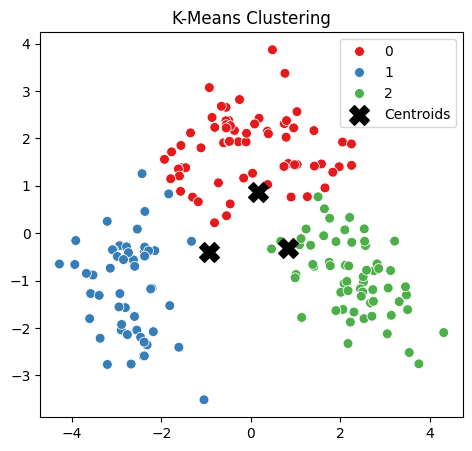

In [4]:
# PCA for 2D visualization

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette="Set1", s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()

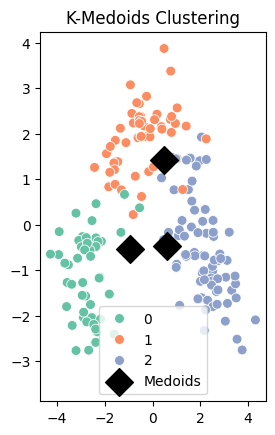

In [5]:
# Plot K-Medoids clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmedoids_labels, palette="Set2", s=50)
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], color='black', marker='D', s=200, label='Medoids')
plt.title("K-Medoids Clustering")
plt.legend()

plt.show()